In [11]:
import temp_fitting as temp_fit
import spec_func as spec
import open_data as read_data
import emission_lines as line
import plotting as plot
import ccf_func as ccf
import injecting_lines as inject

import numpy as np
from astropy.io import fits
import warnings
import time
from astropy.table import Table
from astropy import units as u
import matplotlib.pyplot as plt
from astropy.nddata import StdDevUncertainty
from specutils import Spectrum1D

# Ignore warnings unless debugging
import warnings
warnings.simplefilter("ignore")

# For debugging
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Read data

In [2]:
redfile = '~/Documents/AA_PhD/Projects/WL_high_z/Data/commissioning/L1/stack_3018536.fit'
bluefile = '~/Documents/AA_PhD/Projects/WL_high_z/Data/commissioning/L1/stack_3018537.fit'

spec_info_blue = read_data.readin_spectra(bluefile)
spec_info_red = read_data.readin_spectra(redfile)


9490.0

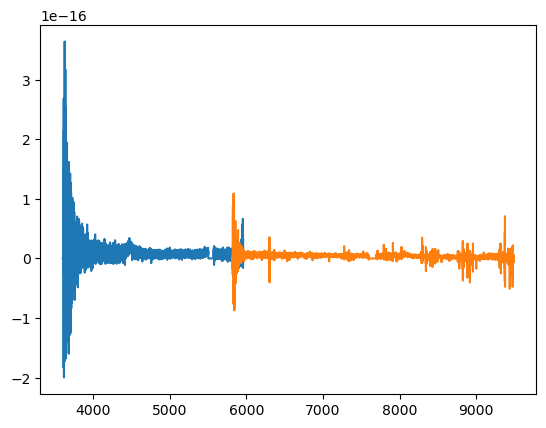

In [3]:
# Testing

plt.plot(spec_info_blue['wl'], spec_info_blue['spectra'][0].flux.value)
plt.plot(spec_info_red['wl'], spec_info_red['spectra'][0].flux.value)

max(spec_info_red['wl'])

## Setup CCF

In [4]:
run_name = 'ccf_commissioning_test_uncertainty' #injecting_lum_std_24nov'#injecting_line_z_22nov'### # Set a name for saving the files


In [8]:
target_bool = (spec_info_blue['table']['TARGUSE'] == 'T') # Identify targets
sky_line_bool = (spec_info_blue['table']['TARGUSE'] == 'S') # Identify sky fibers 

print(len(target_bool), np.sum(target_bool))

# IMPORTANT STEP: Pick specific spectra from OB
# If comment this out then you will run through the full OB (which takes a long time)
target_bool = read_data.pick_spectrum(target_bool, 38, 3) # In this example pick 3 target spectra starting at number 6
sky_line_bool = read_data.pick_spectrum(sky_line_bool, 50, 1) #20 # In this example pick 10 skyline spectra starting at number 60

target_names = spec_info_blue['table']['TARGNAME'][target_bool]


960 603


## Optional: define masking region

In [6]:
# Example: np.array([[wav_start1, wav_stop1], [wav_start2, wav_stop2], etc])

# mask_blue = np.array([[np.nan, np.nan]])
# mask_red = np.array([[np.nan, np.nan]])

# Comment out if you have defined masked wavelength regions 
mask_blue = np.array([[3500, 3900], [5900, 6000]])#False
mask_red = np.array([[5600,6000],[9250, 9500]])#False [9350, 9500] 


## Run CCF

Running CCF for 3 targets...
Target GS141952.89+520116.9
No target redshift known
CCF redshift solutions.. [2.972, 2.974, 4.06, 4.063, 1.543, 2.237, 2.239]
Lines detected before final =  [6153.963458965597, 9042.26186859296]
Ratio redshift 2.2262624388199828
Lines detected =  [6153.96345897 9042.26186859 4508.59952157 4978.22362935]


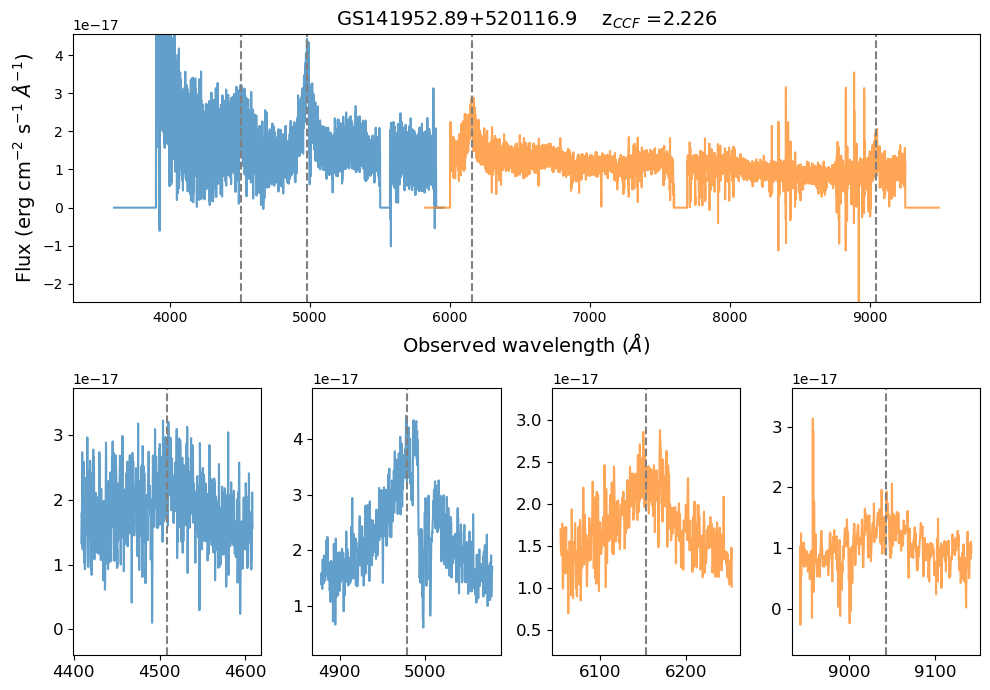

Target JPAS-2241-14099
No target redshift known
CCF redshift solutions.. [1.282, 5.992, 5.996]
Lines detected before final =  []
Ratio redshift nan
Lines detected =  []


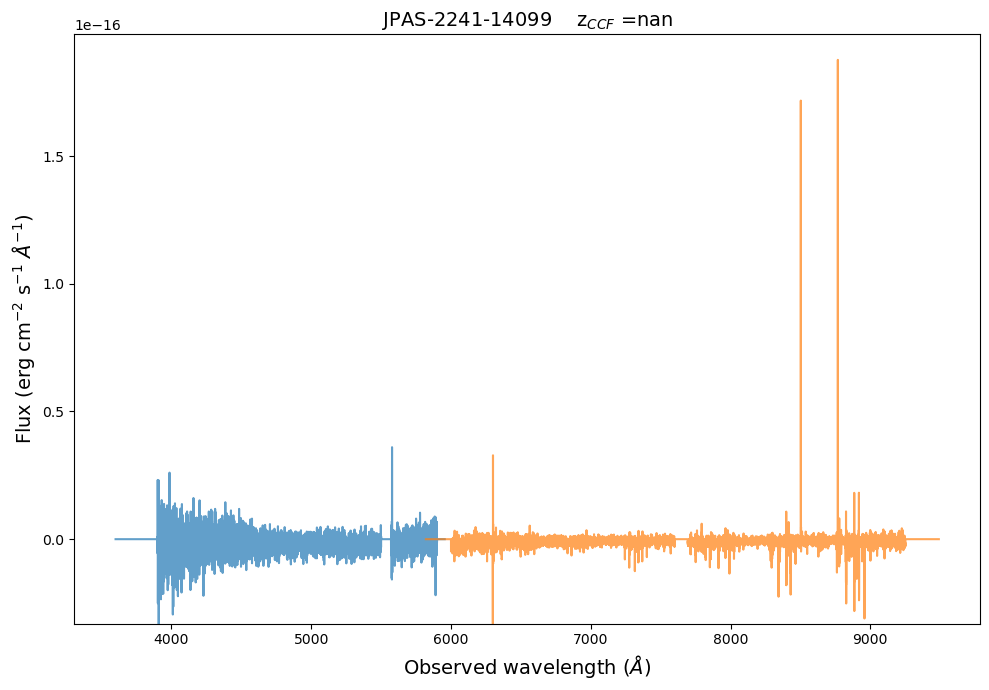

Target JPAS-2241-13192
No target redshift known
CCF redshift solutions.. [2.984, 2.986, 1.464]
Lines detected before final =  []
Ratio redshift nan
Lines detected =  []


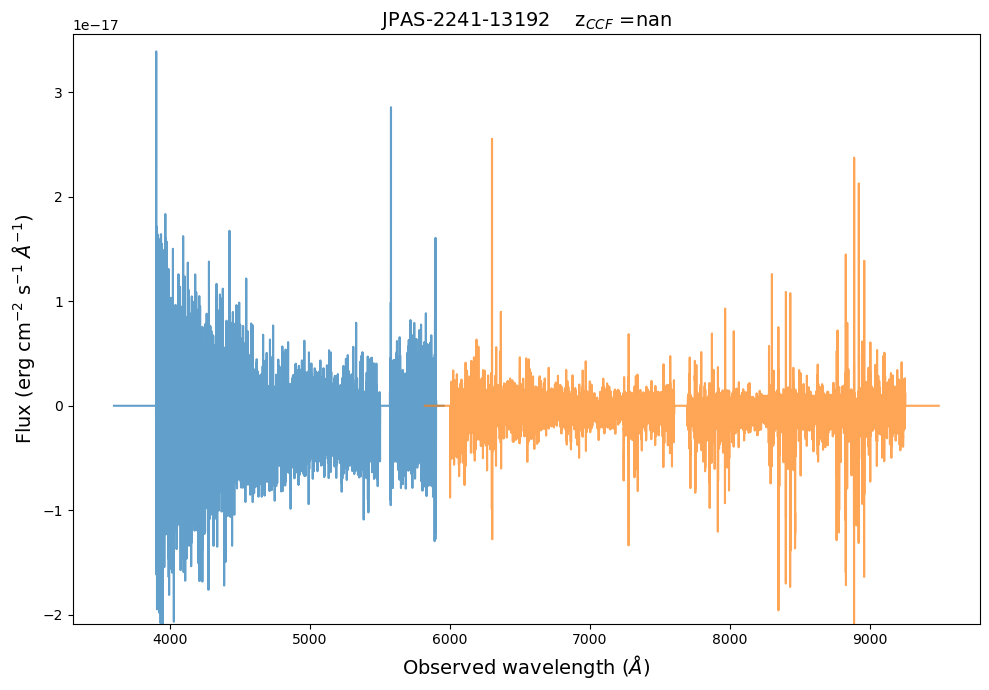

Number single line targets found =  0
Done!


In [7]:
#### Adjust these input variables accordingly:

input_z = False # Set to False if do not have any input redshifts
save_plot = False

# Set to True if you want to save the plots created
write_table = False # Set to True if you want to save the table with the redshift and emission line output
print_output = True # Set to True if you want to print the different steps of the algorithm
diagnostic_output = False # Set to True if you want to save diagnostic plots (not recommended)
show_result = True # Set to True if you want to show resulting spectrum here 
fix_redshift = False # Set to True if you want to fix the redshift to the input redshift and skip the CCF step - determine only emission lines


# Run the CCF and output the redshifts and emission line info
redshifts_template_fitting, emission_line_wavelengths, emission_line_fluxes, emission_line_snrs = temp_fit.template_fitting(spec_info_blue['spectra'][target_bool], spec_info_red['spectra'][target_bool], spec_info_blue['table'][target_bool], spec_info_red['table'][target_bool], target_names, run_name,  mask_blue, mask_red, input_z, save_plot, write_table, print_output, diagnostic_output, show_result, fix_redshift, False)


In [ ]:
# Check these specific spectra:

# Target spectra:
# num 14 missed line cosmic ray? --> mask blue and red part + make for larger STD area for broad lines FIXED
# 16 should find line DONE
# 18 should not find line DONE

# Num 195 assigns "abs" but shouldn't be.. DONE
# Num 572 does find line but does not plot it? liep ook vast bij double gauss DONE
# Why not finding lines in 571? DONE

# Sky spectra:
# Spectrum 6 empty? discard that one
# Sky spec 0 and 1 not finding the line with 43.5 and std any, why? clearly visible. Not sure how to fix --> doesn't get through CCF
# Sky spectrum 8 --> why finding a line there? DONE

# Difference between masking and not masking noisy areas? DONE

# New:
# Num 38 - line missing at 5000 A DONE set width to positive
# Num 85 - line missing at 4400 A DONE

In [ ]:
# This week:
# Run on full data set again (look through for any weird ones) DONE
# Run injecting lines different redshifts (with masking noisy regions) DONE
# Run injecting lines full grid (this time more sky spectra + masked region) DONE
# Run injecting lines different redshifts with high lum 
# Run injecting lines for OII (test if find the double gauss back)

# Try running again with masking blue and red noisy area DONE
# Run injecting lines to compare noise level DONE

## Injecting lines redshift

success
Running CCF for 1 targets...
Optimal parameters not found: Number of calls to function has reached maxfev = 1000.


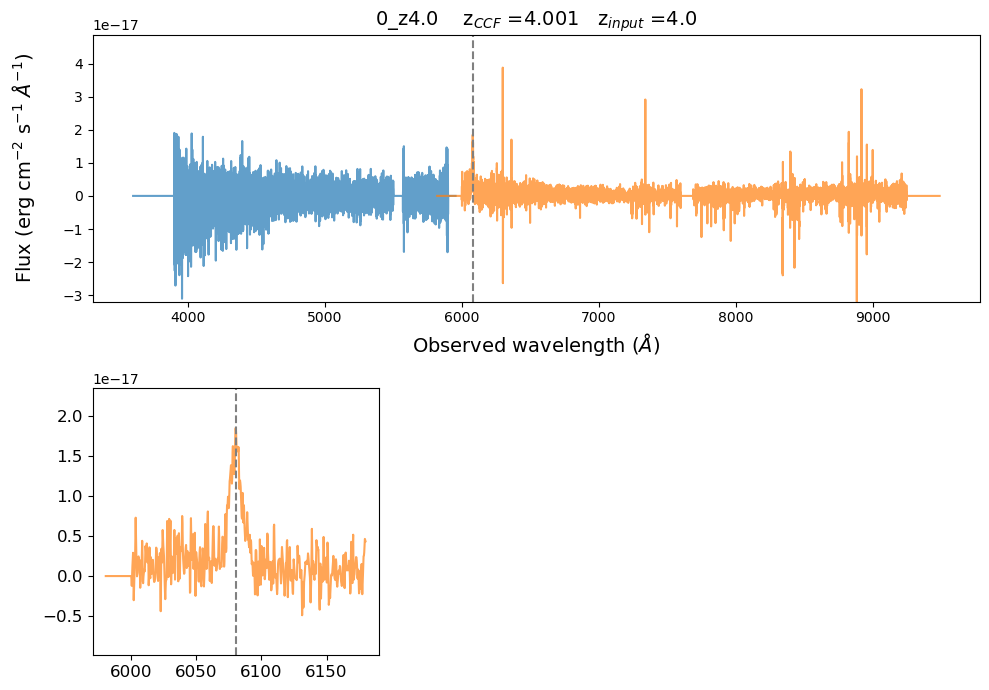

Number single line targets found =  1
Done!
success
Running CCF for 1 targets...
Optimal parameters not found: Number of calls to function has reached maxfev = 1000.


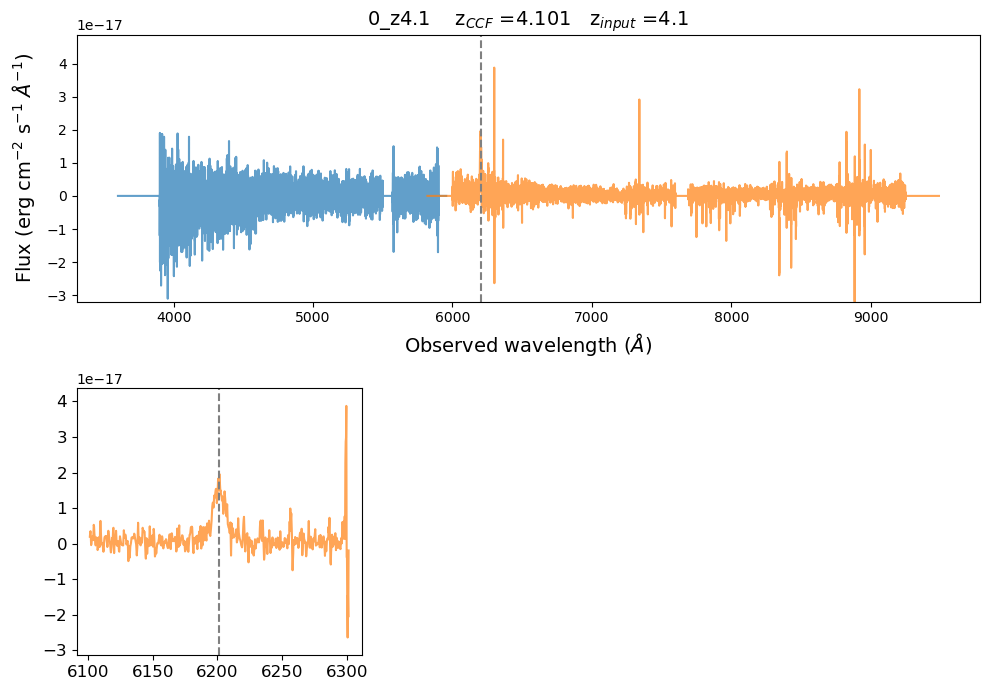

Number single line targets found =  1
Done!
success
Running CCF for 1 targets...
Optimal parameters not found: Number of calls to function has reached maxfev = 1000.


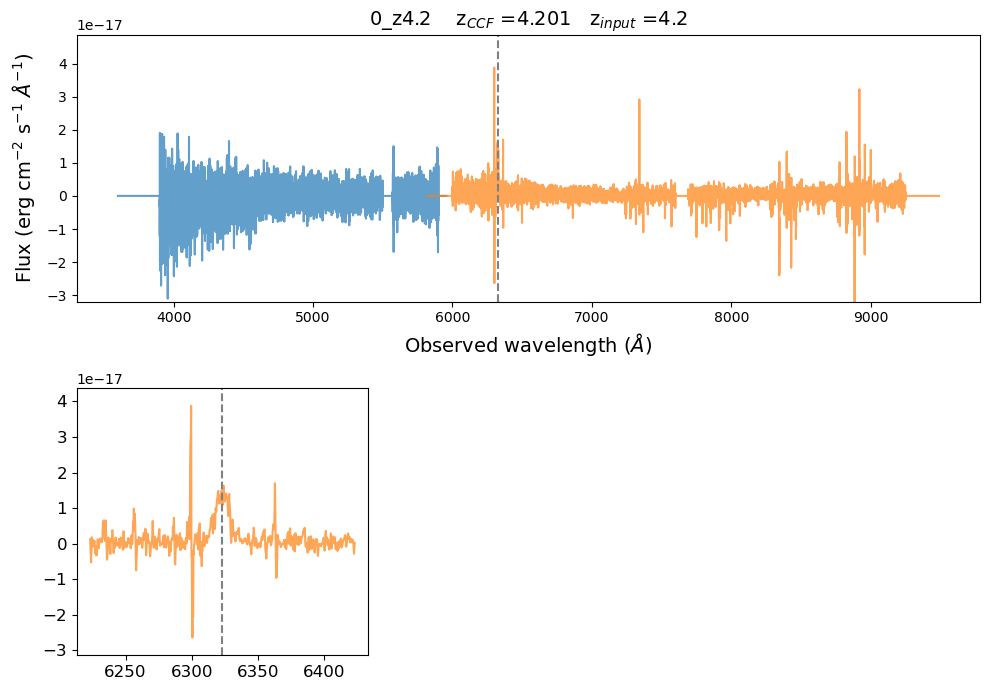

Number single line targets found =  1
Done!
success
Running CCF for 1 targets...
Optimal parameters not found: Number of calls to function has reached maxfev = 1000.


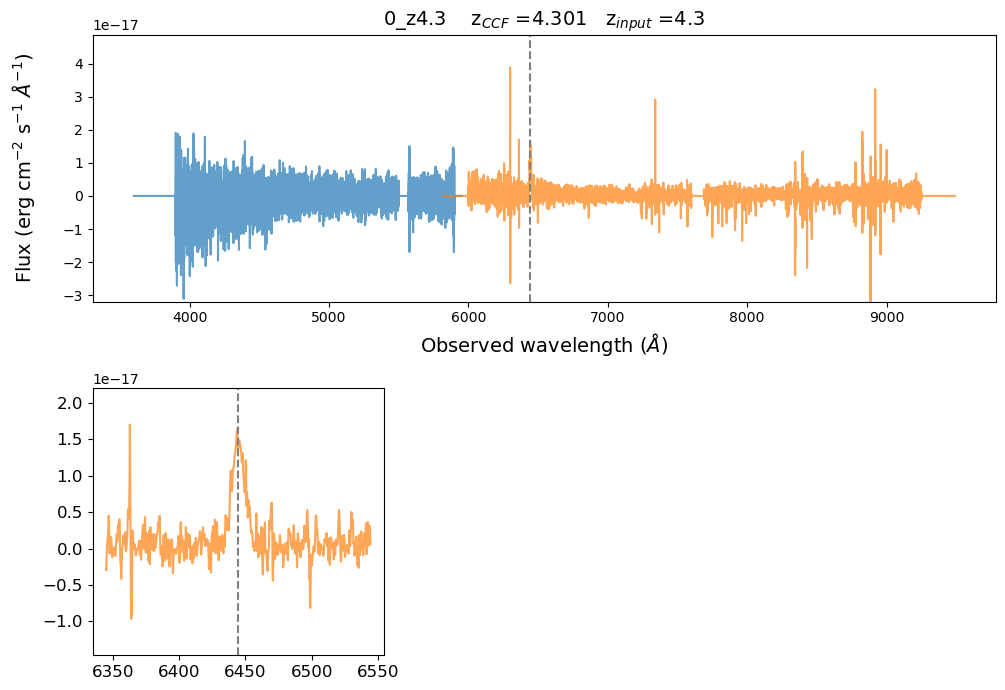

Number single line targets found =  1
Done!
success
Running CCF for 1 targets...
Optimal parameters not found: Number of calls to function has reached maxfev = 1000.


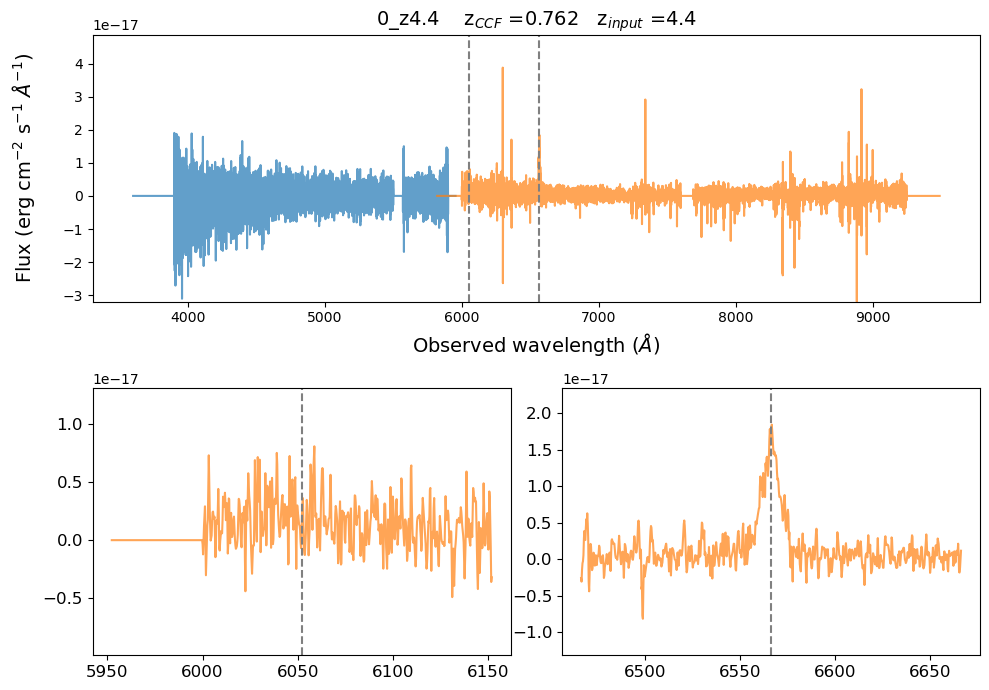

Number single line targets found =  0
Done!


In [12]:
# How much worse/better is the line luminosities that we can pick up compared to simulated data?
write_table = False # Set to True if you want to save the table with the redshift and emission line output
save_plot = False # Set to True if you want to save the plots created
print_output = False # Set to True if you want to print the different steps of the algorithm
diagnostic_bool = False # Set to True if you want to save diagnostic plots (not recommended)
show_result = True # Set to True if you want to show resulting spectrum here


# Example injecting a single emission line at different redshifts

lum_line = 10**43.5 # Luminosity of the line in erg/s - 43.25
std_line = 5.0 # Standard deviation of gaussian in Angstrom
z_line = np.arange(4.0,4.5,0.1) # np.arange(2.3,6.8,0.1)
rest_wav_line = 1216. # wavelength Lya in Angstrom
line_type = 'gaussian'

fraction_detected_lines, spurious_detected_lines, fraction_detected_redshift = inject.inject_gaussian_lines(rest_wav_line, line_type, z_line, lum_line, std_line, spec_info_blue['spectra'][sky_line_bool], spec_info_red['spectra'][sky_line_bool], spec_info_blue['table'][sky_line_bool], spec_info_red['table'][sky_line_bool], np.array([str(i) for i in range(np.sum(sky_line_bool))]), run_name,  mask_blue, mask_red, save_plot, write_table, print_output, diagnostic_bool, show_result)

# Should find the line at z=3... can see it (CCF already does not seem to find it) --> due to noise in blue end 
# Could be worth it to mask first and last bit of each spectrum.... 

# Red more sensitive than blue.. 
# What is happening between 3.5 and 4.0? Is that the masked out region? 
# Check if masked region is not hardcoded

## Injecting lines lum/std

Running CCF for 2 targets...
Optimal parameters not found: Number of calls to function has reached maxfev = 1000.
Number single line targets found =  1
Done!
lum3.162277660168379e+42_std2
Running CCF for 2 targets...
Optimal parameters not found: Number of calls to function has reached maxfev = 1000.
Number single line targets found =  0
Done!
lum3.162277660168379e+42_std5
Running CCF for 2 targets...
Optimal parameters not found: Number of calls to function has reached maxfev = 1000.
Number single line targets found =  1
Done!
lum5.623413251903491e+42_std2
Running CCF for 2 targets...
Optimal parameters not found: Number of calls to function has reached maxfev = 1000.
Number single line targets found =  0
Done!
lum5.623413251903491e+42_std5


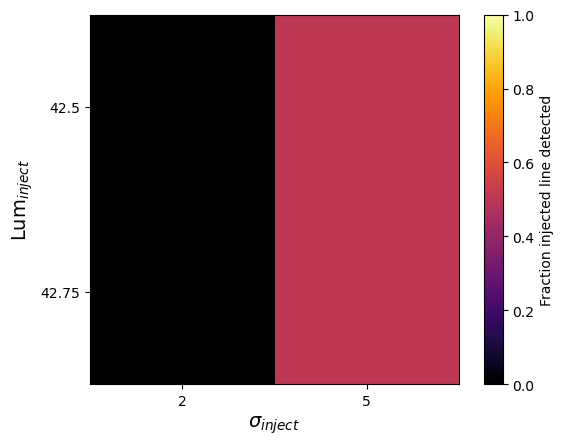

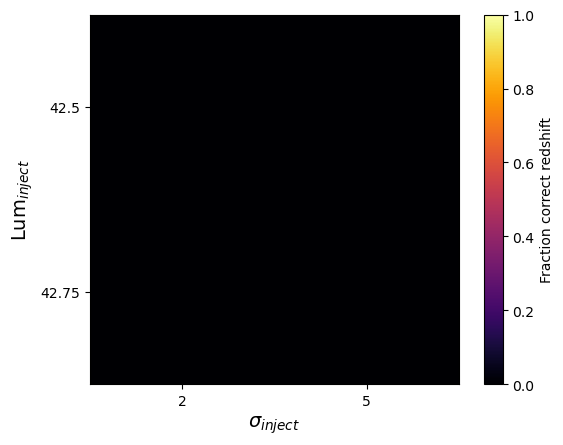

In [80]:
write_table = True # Set to True if you want to save the table with the redshift and emission line output
save_plot = True # Set to True if you want to save the plots created
print_output = False # Set to True if you want to print the different steps of the algorithm
diagnostic_bool = False # Set to True if you want to save diagnostic plots (not recommended)
show_result = False # Set to True if you want to show resulting spectrum here


# Example injecting a single emission line with different luminosities and widths
lum_line = 10**np.arange(42.5,43.0,0.25) # 44.0 Luminosity of the line in erg/s
std_line = np.array([2,5])#,8,11,14]) # Standard deviation of gaussian in Angstrom
z_line = 5.7
rest_wav_line = 1216. # wavelength Lya in Angstrom
line_type = 'gaussian' 

fraction_detected_lines, spurious_detected_lines, fraction_detected_redshift = inject.inject_gaussian_lines(rest_wav_line, line_type, z_line, lum_line, std_line, spec_info_blue['spectra'][sky_line_bool], spec_info_red['spectra'][sky_line_bool], spec_info_blue['table'][sky_line_bool], spec_info_red['table'][sky_line_bool], np.array([str(i) for i in range(np.sum(sky_line_bool))]), run_name,  mask_blue, mask_red, save_plot, write_table, print_output, diagnostic_bool, show_result)

# Harder to pick up the more narrow lines --> try changing the template?
# Masking out noise really helps in finding the lines --> increase mask at red end 
# Residual sky lines/cosmic rays in red band make it hard to find faint lines there 
